# IEQ Survey Analysis from the ASHRAE Thermal Comfort Database

In this notebook we will use the ASHRAE Thermal Comfort Database II. 


You can find the interface for extraction of the dataset with various filters possible: http://www.comfortdatabase.com/

There is an existing data visualization interface found here: https://cbe-berkeley.shinyapps.io/comfortdatabase/

The publication that outlines how the database was created is here: https://www.researchgate.net/publication/325848721_Development_of_the_ASHRAE_Global_Thermal_Comfort_Database_II


### Goal of the Notebook

The goal of this notebook is to introduce various statistics and visualization techniques to analyse data from populations of people. These techniques can be used to understand distributions of objects beyond people -- could be data from BIM models, devices, or other things in the built environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
ieq_data = pd.read_csv("ashrae_thermal_comfort_database_2.csv", index_col='Unnamed: 0')

Let's take a look what's inside the file included in this repository.

In [5]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


In [6]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

## Summarizing Data

In [7]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

In [8]:
ieq_data.describe()

,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
count,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000,43448.000000
mean,2003.163621,0.127440,0.634063,1.177975,25.215932,51.553517,0.202853,0.128222
std,10.326515,1.125046,0.255987,0.251705,3.426420,14.709984,0.317471,1.127096
min,1982.000000,-3.000000,0.000000,0.700000,13.100000,0.500000,0.000000,-3.000000
25%,1994.000000,-0.500000,0.470000,1.000000,22.900000,41.400000,0.060000,0.000000
50%,2010.000000,0.000000,0.620000,1.100000,24.700000,51.600000,0.100000,0.000000
75%,2012.000000,1.000000,0.720000,1.200000,27.200000,62.400000,0.210000,1.000000
max,2016.000000,3.000000,2.870000,6.830000,48.800000,97.800000,6.540000,3.000000


## Understanding the diversity of data in a column full of categories

With data sets like this, we often want to understand the diversity of behavior in each of the columns that have categorical characteristics

In [13]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

In [14]:
len(ieq_data)

43448

In [15]:
ieq_data['Country'].nunique()

17

In [16]:
ieq_data['Country'].value_counts()

India          15191
Brazil          7074
Australia       6940
USA             2950
UK              2056
Portugal        1558
Greece          1283
Thailand        1146
Sweden           940
Malaysia         869
Canada           867
Singapore        812
France           465
Germany          414
Iran             377
Philippines      277
Italy            229
Name: Country, dtype: int64

In [17]:
ieq_data['Building type'].value_counts()

Office                 29913
Classroom               6042
Others                  4615
Multifamily housing     2369
Senior center            509
Name: Building type, dtype: int64

In [18]:
ieq_data['Climate'].value_counts()

Humid subtropical                       8501
Tropical wet savanna                    8135
Hot semi-arid                           8093
Temperate oceanic                       3787
Cool-summer mediterranean               2950
Tropical monsoon                        2075
Tropical rainforest                     1654
Subtropical highland                    1406
Monsoon-influenced humid subtropical    1388
Warm-summer Mediterranean               1311
Warm-summer humid continental           1156
Oceanic                                 1058
Hot-summer mediterranean                 970
Hot-summer Mediterranean                 964
Name: Climate, dtype: int64

In [19]:
ieq_data['Sex'].value_counts()

Male      23777
Female    19671
Name: Sex, dtype: int64

In [20]:
ieq_data['Cooling startegy_building level'].value_counts()

Mixed Mode                 16280
Air Conditioned            14051
Naturally Ventilated       12952
Mechanically Ventilated      165
Name: Cooling startegy_building level, dtype: int64

In [21]:
ieq_data['Year'].value_counts()

2012.0    12372
2010.0     7374
2011.0     2876
1987.0     2792
1999.0     2620
1998.0     2021
1993.0     1606
1994.0     1325
1983.0     1184
1988.0     1146
1982.0     1083
2009.0     1059
1984.0      952
2007.0      869
1992.0      837
1997.0      632
1995.0      537
2016.0      452
2005.0      414
1986.0      350
2015.0      289
2003.0      277
2008.0      229
1991.0      152
Name: Year, dtype: int64

In [22]:
ieq_data['Season'].value_counts()

Summer    18187
Winter    11932
Autumn     6743
Spring     6586
Name: Season, dtype: int64

In [23]:
ieq_data['ThermalSensation_rounded'].value_counts()

 0.0    19537
 1.0     8396
-1.0     7693
 2.0     3657
-2.0     2459
 3.0     1265
-3.0      441
Name: ThermalSensation_rounded, dtype: int64

### Pivoting Dataframes

In [24]:
ieq_data_pivoted = ieq_data.pivot_table(index='Country', columns='ThermalSensation_rounded', values='Air temperature (C)', aggfunc='mean')

In [25]:
ieq_data_pivoted

ThermalSensation_rounded,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
Country,,,,,,,
Australia,22.077647,22.547732,22.852261,23.397811,24.380476,25.771105,26.885507
Brazil,22.836364,23.992857,24.025164,25.080711,26.459480,27.881450,28.317460
Canada,22.629630,22.824762,23.152778,23.366270,24.154762,24.703509,26.150000
France,21.425000,21.488889,22.760274,23.730128,24.630405,25.576119,28.862500
Germany,NaN,NaN,21.891667,24.311382,25.343750,NaN,27.228571
Greece,25.875000,26.835294,26.430631,28.266518,29.799083,30.904965,32.677778
India,22.498425,24.942129,25.219574,25.765046,27.973600,29.776419,30.801503
Iran,NaN,16.513333,17.825806,20.526882,22.257143,NaN,NaN
Italy,NaN,25.233333,25.261905,25.082836,26.109756,26.105882,27.190000


This transformation has converted the larger raw data set into one that shows the average outside air temperatures for each country in the using the different Thermal Sensations (Rounded) -- this is very interested to compare the different locations

### Melting a DataFrame (Unpivoting)

Sometimes you will have an aggregated DataFrame that you want to make tall and skinny -- this might be done because other models or visualization techniques require this format -- especially those from Seaborn

In [26]:
ieq_data_pivoted.melt().head()

,ThermalSensation_rounded,value
0,-3.0,22.077647
1,-3.0,22.836364
2,-3.0,22.629630
3,-3.0,21.425000
4,-3.0,NaN


In [27]:
ieq_data.groupby("Country").mean()

,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
Country,,,,,,,,
Australia,1993.472190,0.133530,0.580548,1.218186,23.747651,50.347320,0.140030,0.133141
Brazil,2010.000000,0.141787,0.527037,1.088762,25.369211,64.132627,0.299327,0.141787
Canada,1994.491349,-0.280277,0.721569,1.211073,23.475663,33.447174,0.086367,-0.280277
France,1998.554839,0.436559,0.749505,1.375484,24.155484,38.222151,0.234301,0.436559
Germany,2005.000000,0.483092,0.560676,1.449034,24.757729,48.612560,1.113116,0.483092
Greece,1994.552611,0.524552,0.470966,1.243024,29.038270,35.262120,0.336633,0.524552
India,2011.875518,0.058930,0.704502,1.122783,26.440109,49.166757,0.210093,0.060891
Iran,1999.000000,-0.188329,1.484987,1.517507,20.019363,61.959947,0.031353,-0.188329
Italy,2008.000000,0.314410,0.624061,1.290830,25.455022,34.427948,0.589651,0.314410


In [28]:
ieq_data.groupby("Country").median()

,Year,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
Country,,,,,,,,
Australia,1992.0,0.0,0.540,1.17,23.5,50.80,0.11,0.0
Brazil,2010.0,0.0,0.500,1.00,25.3,64.00,0.20,0.0
Canada,1994.0,0.0,0.700,1.20,23.3,34.10,0.08,0.0
France,1999.0,0.0,0.730,1.30,24.1,38.10,0.05,0.0
Germany,2005.0,0.0,0.560,1.30,24.4,48.20,0.53,0.0
Greece,1993.0,1.0,0.390,1.20,29.5,34.90,0.20,1.0
India,2012.0,0.0,0.680,1.10,26.2,48.00,0.10,0.0
Iran,1999.0,0.0,1.500,1.60,20.3,63.00,0.03,0.0
Italy,2008.0,0.0,0.620,1.20,25.7,30.40,0.09,0.0


In [29]:
ieq_data.groupby("Country").size()

Country
Australia       6940
Brazil          7074
Canada           867
France           465
Germany          414
Greece          1283
India          15191
Iran             377
Italy            229
Malaysia         869
Philippines      277
Portugal        1558
Singapore        812
Sweden           940
Thailand        1146
UK              2056
USA             2950
dtype: int64

# Plotting populations of data

In [30]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

<AxesSubplot:>

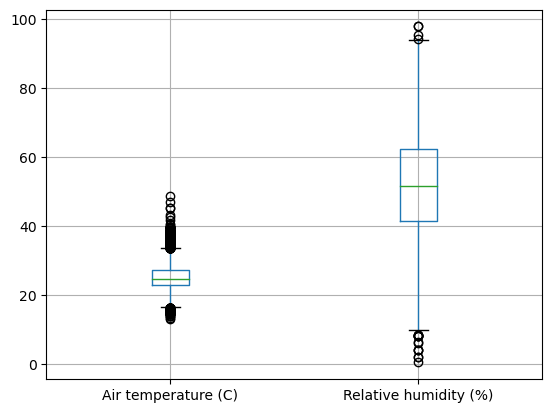

In [31]:
ieq_data[['Air temperature (C)','Relative humidity (%)']].boxplot()

<AxesSubplot:>

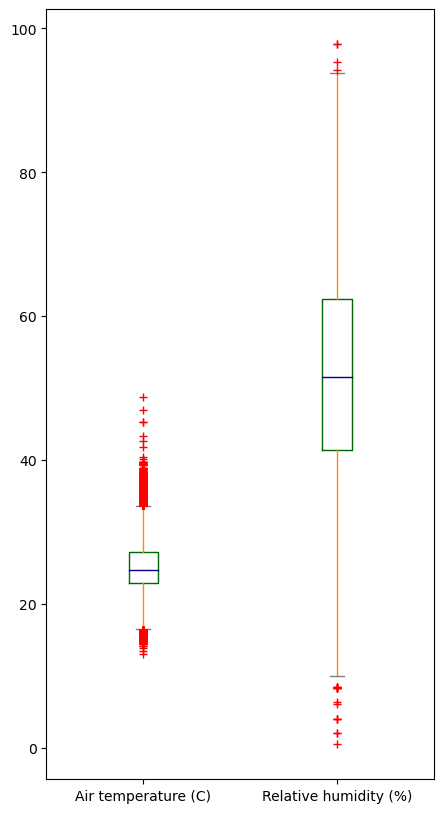

In [32]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',  'medians': 'DarkBlue', 'caps': 'Gray'}
ieq_data[['Air temperature (C)','Relative humidity (%)']].plot.box(color=color, sym='r+', figsize=(5,10))

<AxesSubplot:>

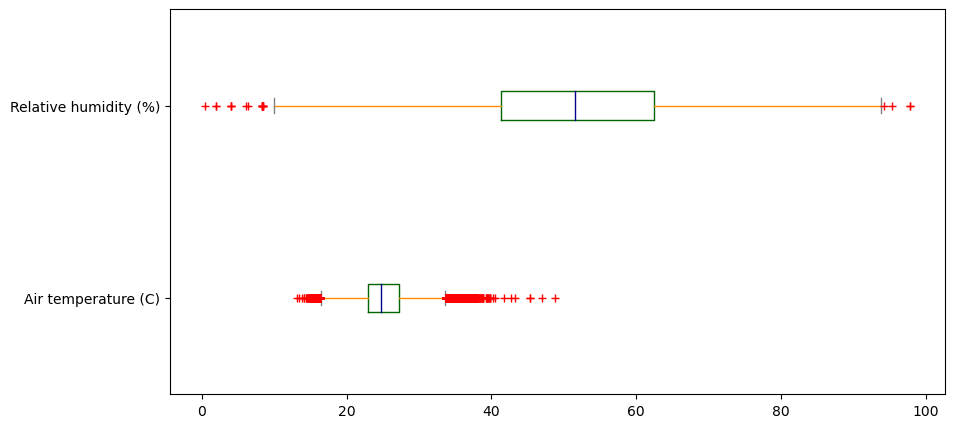

In [33]:
ieq_data[['Air temperature (C)','Relative humidity (%)']].plot.box(color=color, sym='r+', figsize=(10,5), vert=False)

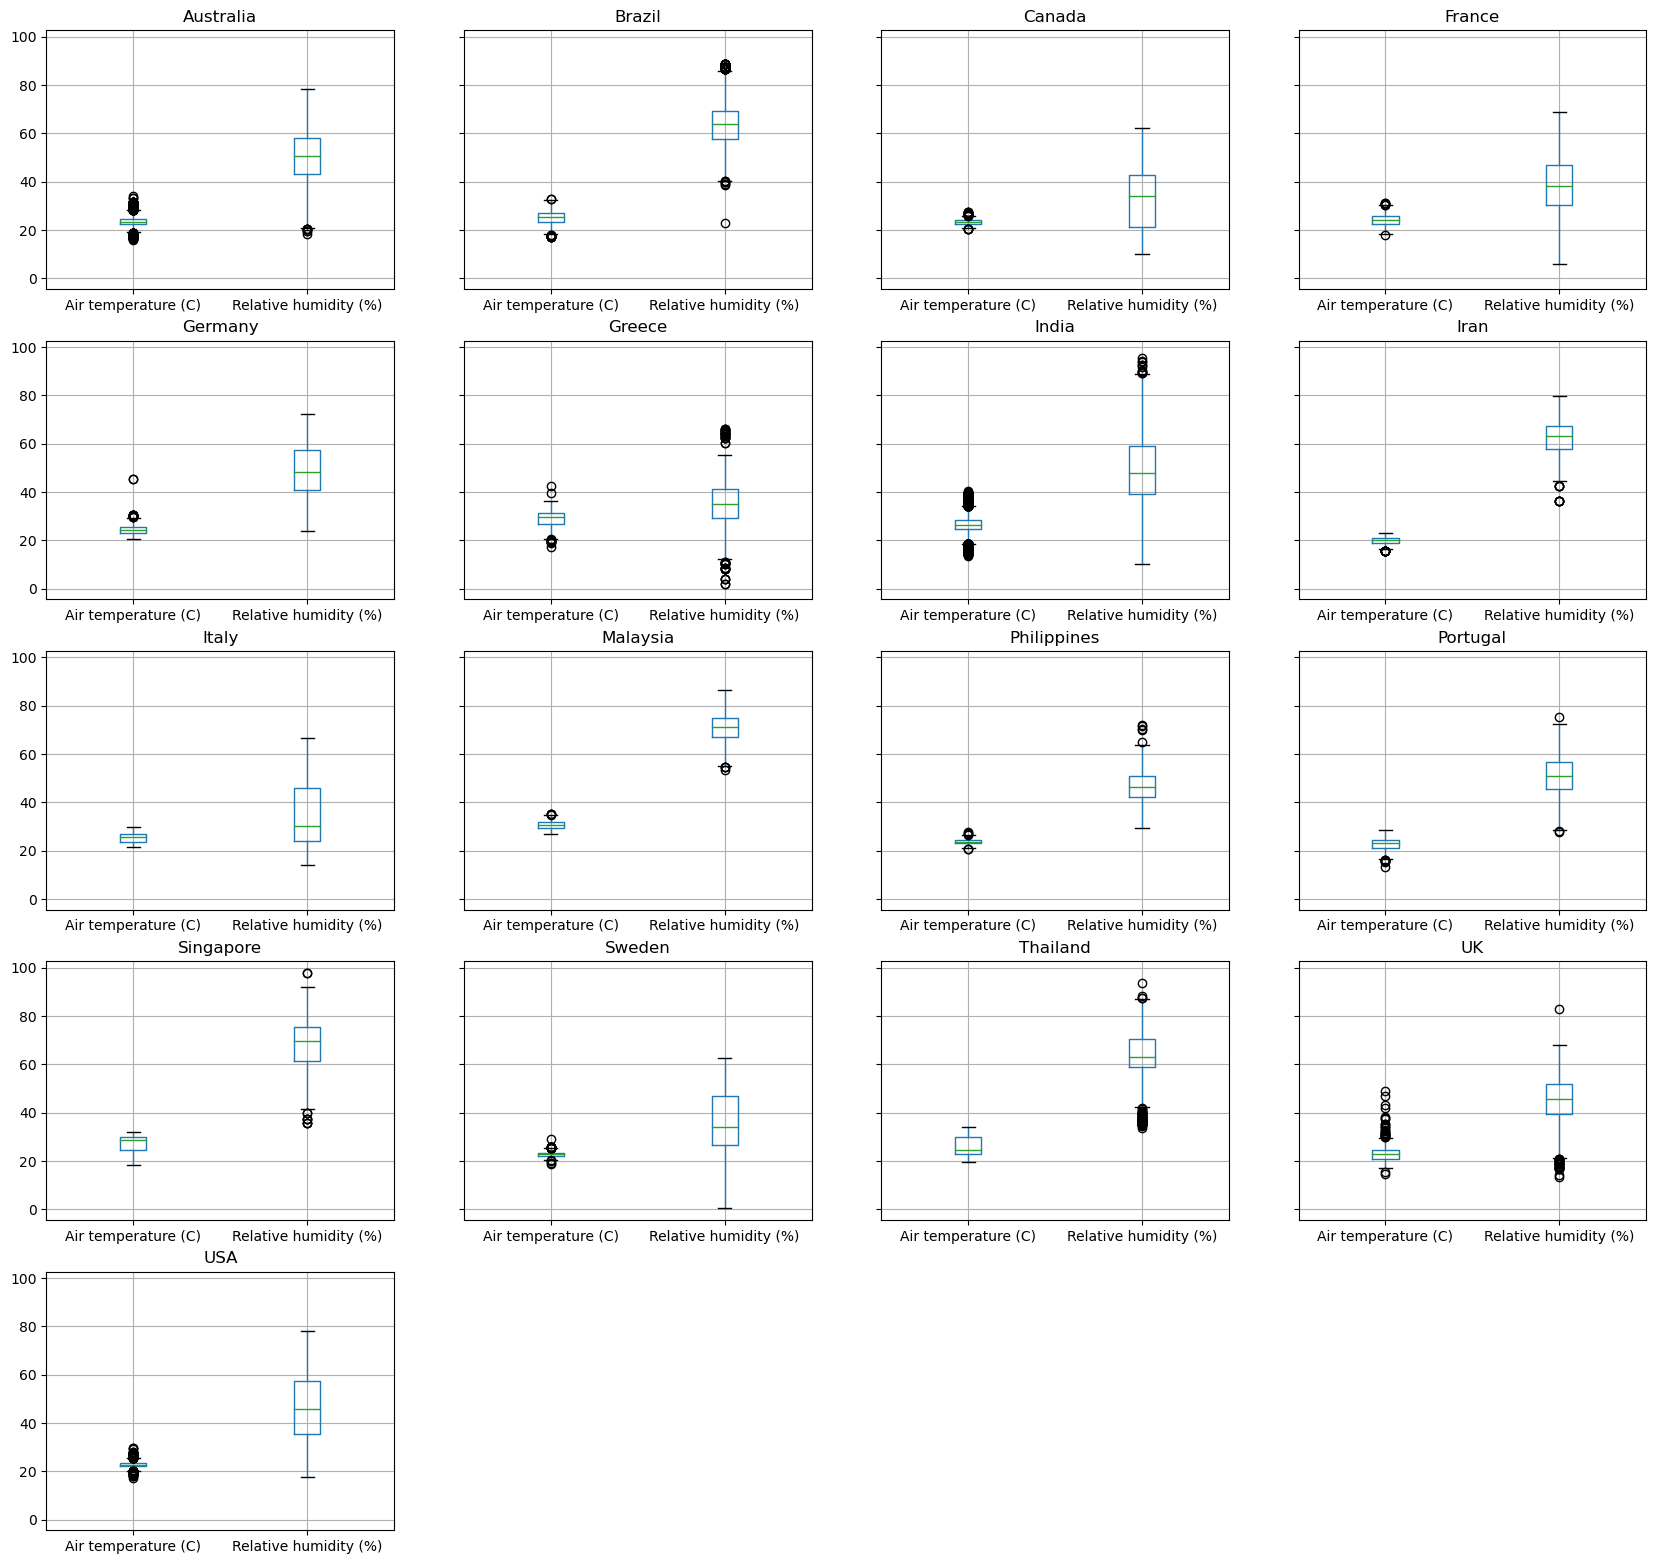

In [34]:
ieq_data[['Air temperature (C)','Relative humidity (%)','Country']].groupby('Country').boxplot(figsize=(20,20));

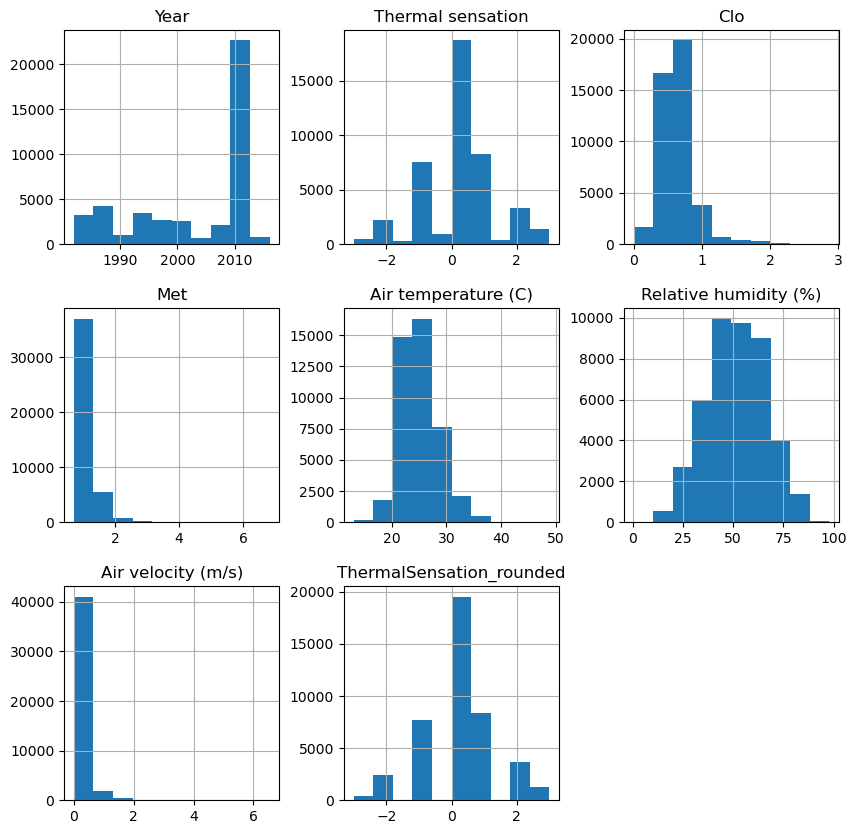

In [35]:
ieq_data.hist(figsize=(10,10));

<AxesSubplot:ylabel='Density'>

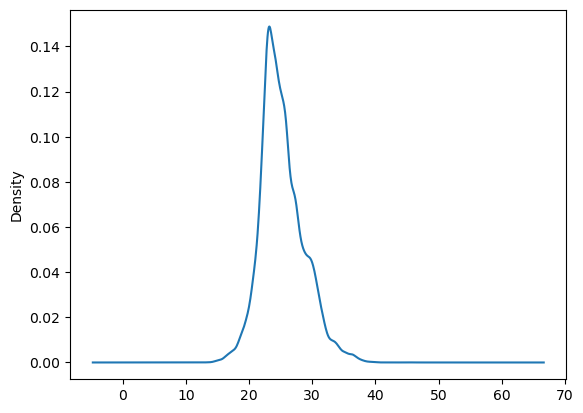

In [36]:
ieq_data['Air temperature (C)'].plot.kde()

In [37]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperatur

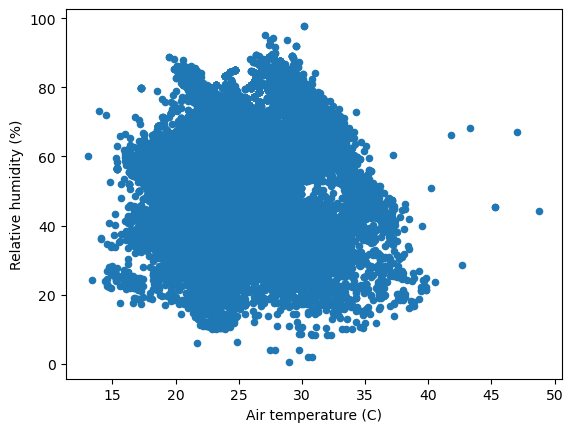

In [38]:
ieq_data.plot.scatter(x='Air temperature (C)', y='Relative humidity (%)');

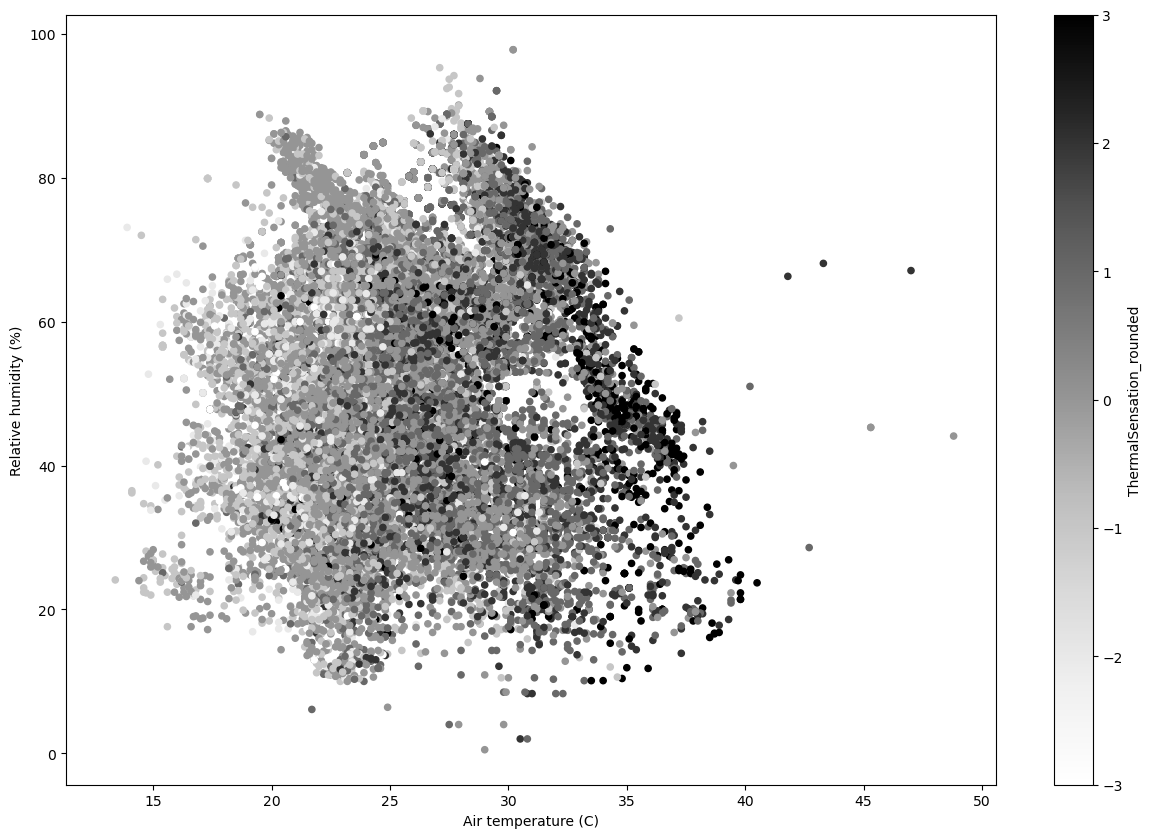

In [39]:
ieq_data.plot.scatter(x='Air temperature (C)', y='Relative humidity (%)', c='ThermalSensation_rounded', figsize=(15,10));

In [40]:
from pandas.plotting import scatter_matrix

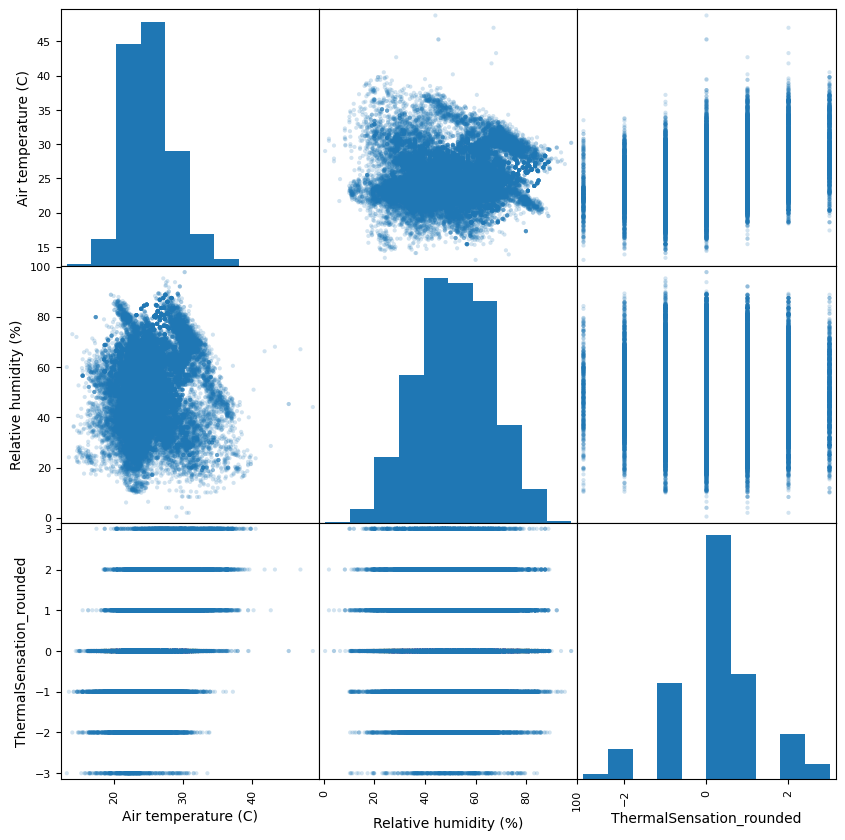

In [41]:
scatter_matrix(ieq_data[['Air temperature (C)','Relative humidity (%)','ThermalSensation_rounded']], alpha=0.2, figsize=(10,10), diagonal='hist');

In [42]:
from pandas.plotting import parallel_coordinates


In [43]:
ieq_data[['Air temperature (C)','Relative humidity (%)','ThermalSensation_rounded','Air velocity (m/s)']].iloc[:500].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 2233 to 2732
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Air temperature (C)       500 non-null    float64
 1   Relative humidity (%)     500 non-null    float64
 2   ThermalSensation_rounded  500 non-null    float64
 3   Air velocity (m/s)        500 non-null    float64
dtypes: float64(4)
memory usage: 19.5 KB


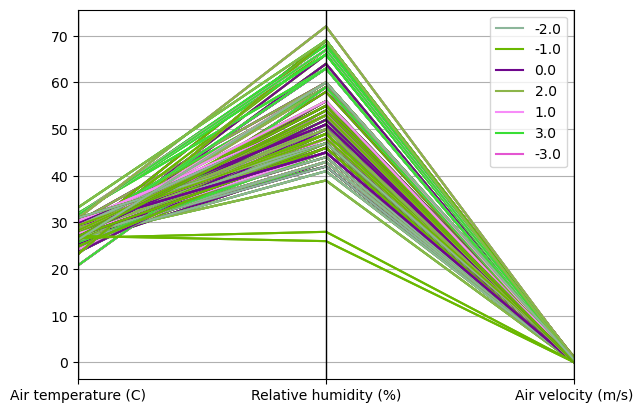

In [44]:
parallel_coordinates(ieq_data[['Air temperature (C)','Relative humidity (%)','ThermalSensation_rounded','Air velocity (m/s)']].iloc[:500], 'ThermalSensation_rounded');

#### Reference:
- Data Science for Construction, Architecture and Engineering by Clayton Miller (clayton@nus.edu.sg - miller.clayton@gmail.com):
https://www.edx.org/learn/data-science/the-national-university-of-singapore-data-science-for-construction-architecture-and-engineering
- Simulation files and visualizations created by Miguel Martin (miguel.martin@u.nus.edu.sg)